## Histogram

Image Histogram is a graph, that gives us the pixel intensity distriution of an image. Pixel Intensity value of 8-bit image ranges from 0-255.

Looking at the histogram of an image, you get an intuition about:
    • contrast, 
    • brightness, 
    • intensity distribution, etc. 
Therefore It is just another way of understanding the Picture.
 




In [2]:
!wget --no-check-certificate 'https://www.publicdomainpictures.net/pictures/20000/velka/bush-roses-117101295939187IVE.jpg' -O flower.PNG

--2023-09-05 16:30:44--  https://www.publicdomainpictures.net/pictures/20000/velka/bush-roses-117101295939187IVE.jpg
Resolving www.publicdomainpictures.net (www.publicdomainpictures.net)... 104.20.122.60, 104.20.123.60, 172.67.1.236, ...
Connecting to www.publicdomainpictures.net (www.publicdomainpictures.net)|104.20.122.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 277649 (271K) [image/jpeg]
Saving to: ‘flower.PNG’

flower.PNG          100%[===================>] 271.14K  --.-KB/s    in 0.05s   

2023-09-05 16:30:44 (4.83 MB/s) - ‘flower.PNG’ saved [277649/277649]



In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

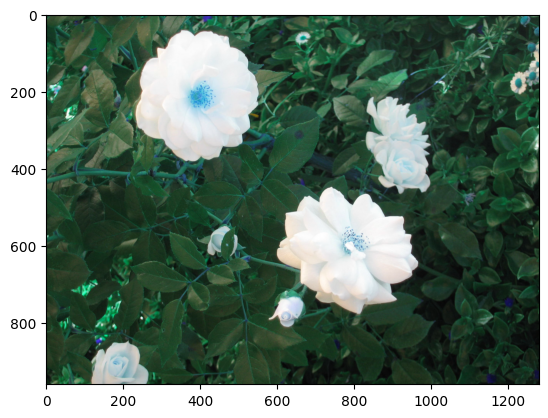

In [5]:
# load image
image_path = '../dataset/rose_flower.png'

img = cv2.imread(image_path)

# Plot image
plt.imshow(img)


In [6]:
min_val = 0
max_val = 256

In [7]:
hist = cv2.calcHist([img],[0],None,[256],[min_val,max_val])

In [8]:
hist.shape

(256, 1)

hist is a 256x1 array.

- bins = 256




## What is bins?

8 bit Image contains pixel intensity in the range [0−255].
If you count how many pixel values does [0−15] has then it is called bins. The above output bins= 256 gives range of information value for full scale image histogram. Because you have passed 256 as histSize

argument.

   - histSize: It represents BIN count.You should pass it on square brackets. In our example above, we have used a full-scale histogram. 

### Histogram Calculation using Numpy


Numpy also provides you a function, np.histogram().

    hist,bins = np.histogram(img.ravel(),256,[0,256])



In [9]:
hist,bins = np.histogram(img.ravel(),max_val,[min_val,max_val])
print(hist.shape)
print(bins.shape)

(256,)
(257,)


 But bins will have 257 elements, because Numpy calculates bins as 0-0.99, 1-1.99, 2-2.99 etc. So final range would be 255-255.99. To represent that, they also add 256 at end of bins. But we don't need that 256. Upto 255 is sufficient.



### Plotting Histograms

- Using Matplotlib
- Using OpenCV

### Matplotlib

Matplotlib directly finds the histogram and plot it. you donot need calcHist() or np.histogram() function.


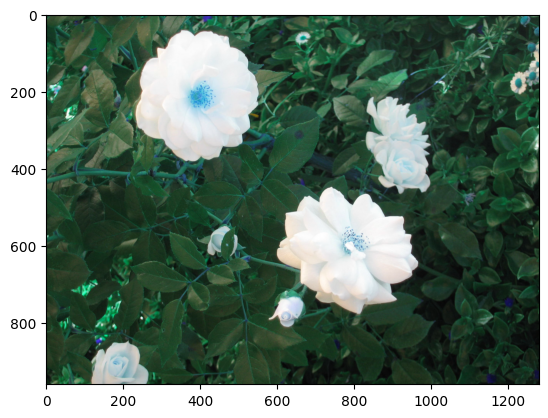

In [10]:
plt.imshow(img,cmap='gray')

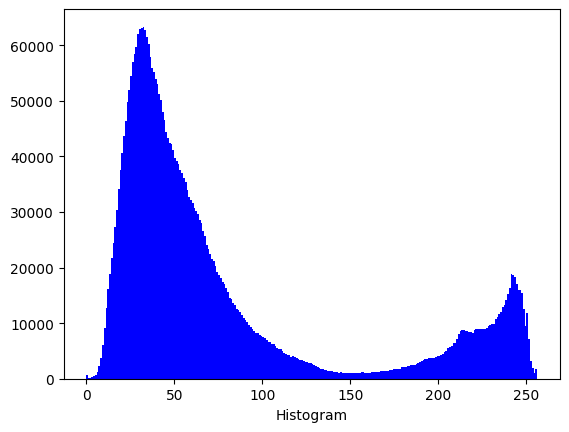

In [11]:
plt.hist(img.ravel(),max_val,[min_val,max_val],color='blue')
plt.xlabel("Histogram")
# plt.savefig('histogram.PNG')
plt.show()

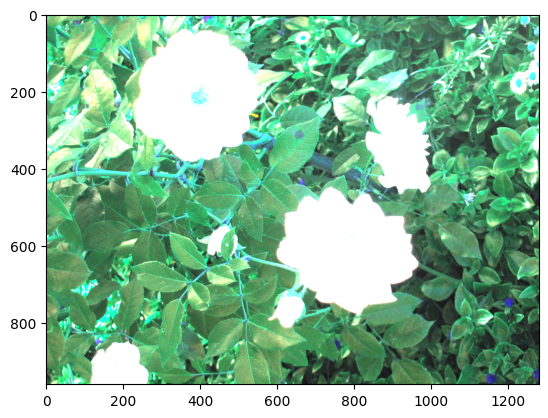

In [12]:
new_image = cv2.convertScaleAbs(img, alpha=2.5, beta=5)
plt.imshow(new_image,cmap='gray')

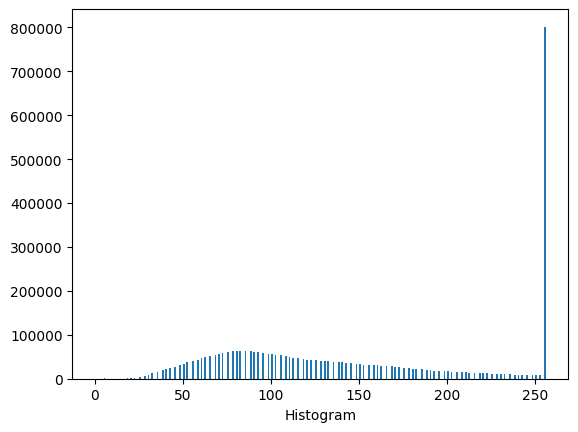

In [13]:
plt.hist(new_image.ravel(),max_val,[min_val,max_val])
plt.xlabel("Histogram")
plt.show()




Now the pixel is densly distributed in range 50-255.


#### Using OpenCV

Use cv2.calcHist()(in-built function in OpenCV) to find the histogram.


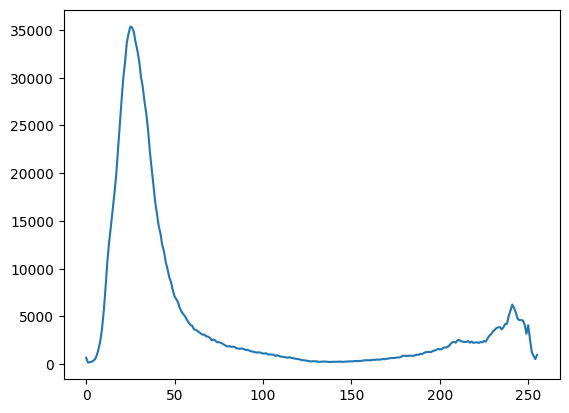

In [14]:
# find frequency of pixels in range 0-255 
histr = cv2.calcHist([img],[0],None,[max_val],[min_val,max_val]) 
# show the plotting graph of an image 
plt.plot(histr) 
plt.show() 



In [15]:
histogram32  = cv2.calcHist([img],[0],None,[32],[min_val,max_val]) 
histogram64  = cv2.calcHist([img],[0],None,[64],[min_val,max_val]) 
histogram150 = cv2.calcHist([img],[0],None,[150],[min_val,max_val]) 
histr        = cv2.calcHist([img],[0],None,[256],[min_val,max_val]) 

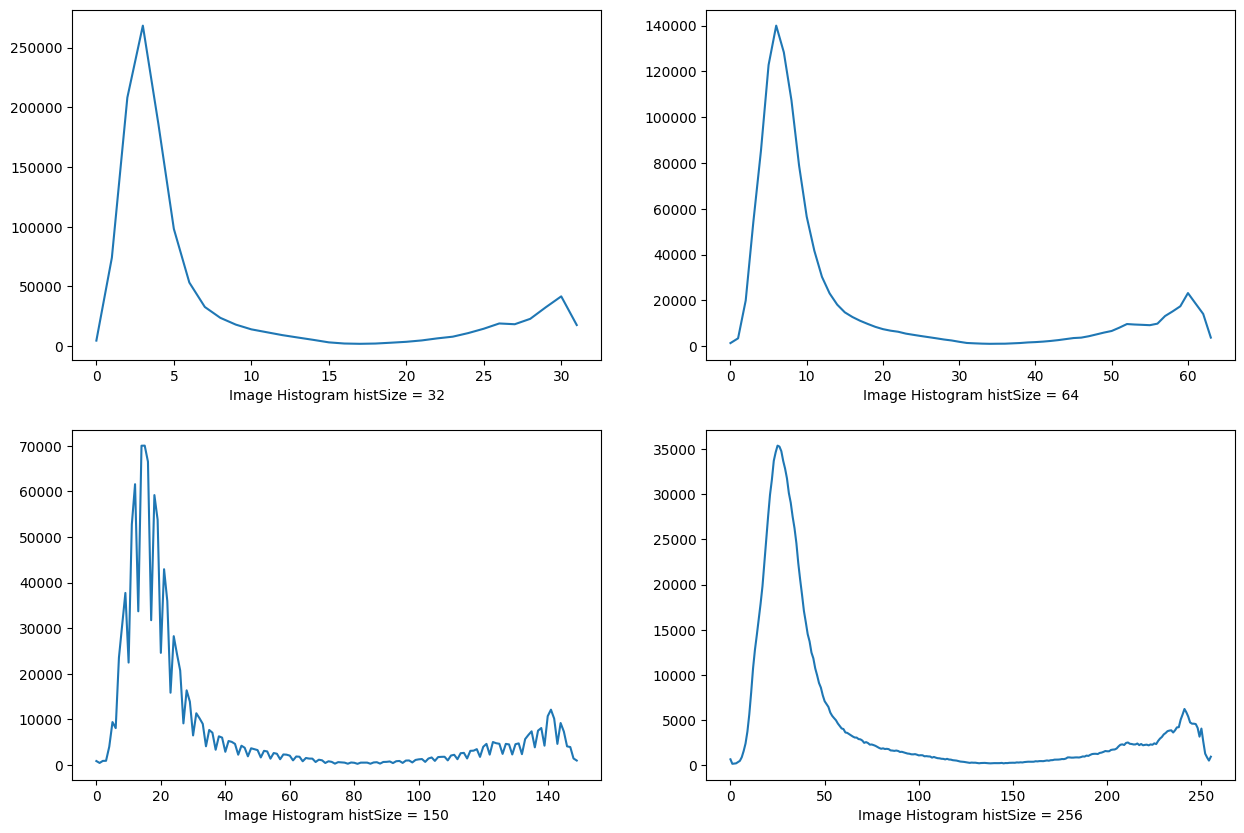

In [16]:
#@title Change in bins 
f, axes = plt.subplots(2, 2 , figsize=(15,10))
axes[0,0].plot(histogram32)
axes[0,1].plot(histogram64)
axes[1,0].plot(histogram150)
axes[1,1].plot(histr)
plt.setp(axes[0,0], xlabel='Image Histogram histSize = 32')
plt.setp(axes[0,1], xlabel='Image Histogram histSize = 64')
plt.setp(axes[1,0], xlabel='Image Histogram histSize = 150')
plt.setp(axes[1,1], xlabel='Image Histogram histSize = 256')
# f.tight_layout()
# plt.savefig('binchange.PNG')
plt.show()





Change in histSize
parameter gives different histogram. You can notice the difference on each peak of a histogram and the histogram scale on the x and y-axis.

## Histogram Equalization

The goal of histogram equalization is to find and apply a point operation such that the histogram of the modified image is flat.

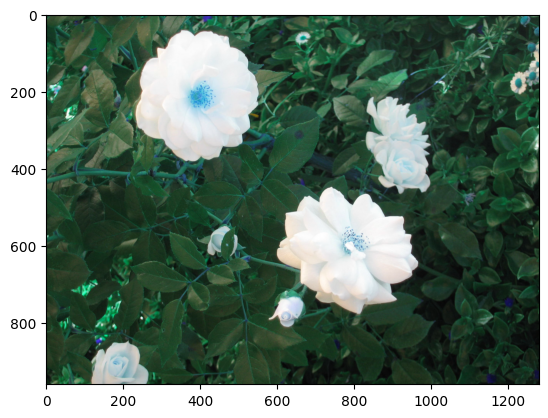

In [17]:
# load image
image_path = '../dataset/rose_flower.png'

img = cv2.imread(image_path)

# Plot image
plt.imshow(img)

In [20]:
image_gray =   cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(image_gray)

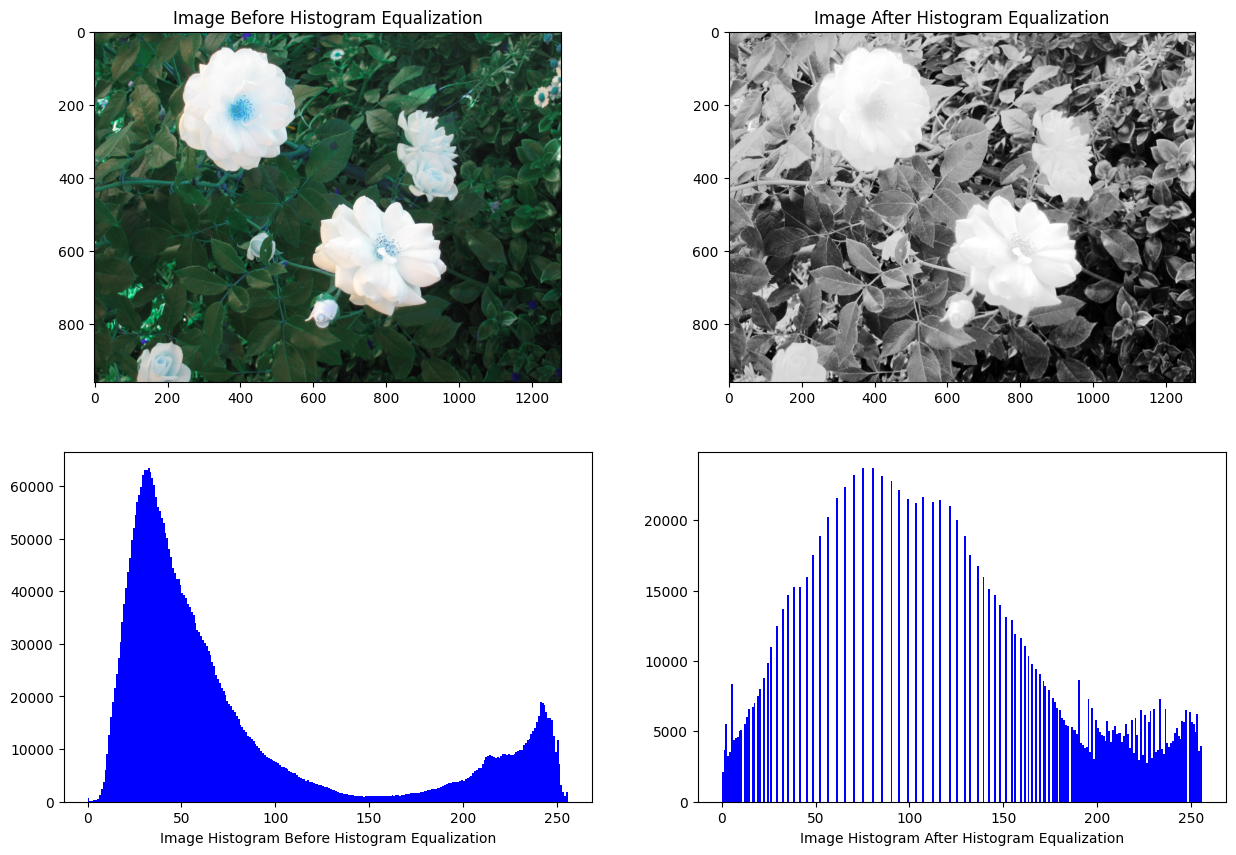

In [21]:
f, axes = plt.subplots(2, 2 , figsize=(15,10))
axes[0,0].imshow(img,cmap='gray')
axes[0,1].imshow(equ,cmap='gray')
axes[1,0].hist(img.flatten(),max_val,[min_val,max_val], color = 'blue')
axes[1,1].hist(equ.flatten(),max_val,[min_val,max_val], color = 'blue')
plt.setp(axes[0,0], title='Image Before Histogram Equalization')
plt.setp(axes[0,1], title='Image After Histogram Equalization')
plt.setp(axes[1,0], xlabel='Image Histogram Before Histogram Equalization')
plt.setp(axes[1,1], xlabel='Image Histogram After Histogram Equalization')
# f.tight_layout()
# plt.savefig('equalization.PNG')
plt.show()


Now we see a more precise image with its pixels distributed form 0-255.

Suppose you are developing some computer vision applications in which leaf is a crucial element. You cannot deny the presence of leaves; then, you need leaves to be more precise.

As we can see, the equalization of the image made leaves more clear.
